                                          Flow_ID           Src_IP  Src_Port  \
0        192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1         192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2          192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3          192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4       192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   
...                                           ...              ...       ...   
625778   192.168.0.24-210.89.164.90-56112-8043-17     192.168.0.24     56112   
625779    192.168.0.13-222.131.171.244-554-4570-6  222.131.171.244      4570   
625780     192.168.0.13-192.168.0.16-9020-52739-6     192.168.0.16     52739   
625781     192.168.0.13-192.168.0.16-9020-49784-6     192.168.0.13      9020   
625782   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   

                 Dst_IP  Dst_Port  Prot

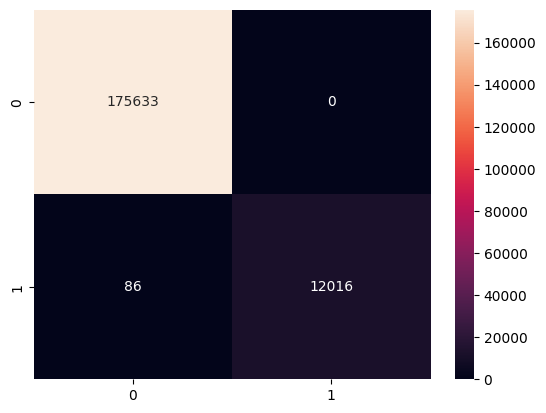

In [1]:
# Mengimpor pustaka pandas untuk manipulasi dan analisis data
import pandas as pd
# Pandas digunakan karena menyediakan struktur data dan fungsi yang kuat dan mudah digunakan untuk manipulasi data.

# Mengimpor pustaka numpy untuk komputasi numerik
import numpy as np
# Numpy digunakan karena menyediakan dukungan untuk array dan matriks, serta fungsi matematika untuk operasi numerik.

# Mengimpor fungsi train_test_split untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Fungsi ini digunakan untuk membagi dataset menjadi dua bagian (pelatihan dan pengujian) sehingga model dapat dilatih dan diuji.

# Mengimpor kelas GaussianNB untuk implementasi algoritma Naive Bayes dengan asumsi distribusi Gaussian
from sklearn.naive_bayes import GaussianNB
# Algoritma Naive Bayes digunakan karena merupakan metode klasifikasi yang efisien dan mudah diimplementasikan.

# Mengimpor fungsi classification_report dan confusion_matrix untuk membangun laporan teks yang menunjukkan metrik klasifikasi utama
from sklearn.metrics import classification_report, confusion_matrix
# Fungsi ini digunakan untuk mengevaluasi kinerja model dengan menghitung metrik seperti presisi, recall, dan f1-score.

# Mengimpor kelas LabelEncoder dan StandardScaler untuk preprocessing data
from sklearn.preprocessing import LabelEncoder, StandardScaler
# LabelEncoder digunakan untuk mengubah label kategori menjadi angka. StandardScaler digunakan untuk penskalaan fitur.

# Mengimpor kelas SimpleImputer untuk mengisi nilai yang hilang dalam data
from sklearn.impute import SimpleImputer
# SimpleImputer digunakan untuk mengisi nilai yang hilang dalam dataset, yang merupakan langkah penting dalam preprocessing data.

# Mengimpor pustaka seaborn dan matplotlib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
# Seaborn dan Matplotlib digunakan untuk visualisasi data, seperti membuat confusion matrix.

# Membaca file CSV dan menyimpannya dalam DataFrame pandas
df = pd.read_csv('IoT Network Intrusion Dataset.csv')
# Fungsi ini digunakan untuk membaca file CSV dan mengubahnya menjadi DataFrame pandas untuk analisis lebih lanjut.

# Menampilkan DataFrame
print(df)
# Fungsi ini digunakan untuk menampilkan DataFrame agar kita dapat melihat data apa yang kita miliki.

# Menampilkan informasi ringkasan tentang DataFrame
df.info(); print()
# Fungsi ini digunakan untuk mendapatkan ringkasan singkat tentang DataFrame, seperti jumlah baris, tipe data, dll.

# Menyimpan kolom 'Label' sebagai array numpy dan mengubah bentuknya menjadi vektor kolom
y = df['Label'].values.reshape(-1, 1)
# Kode ini digunakan untuk menyimpan label target dalam array numpy. Reshape digunakan untuk memastikan bahwa y adalah vektor kolom.

# Membuang kolom 'Label' dari DataFrame dan menyimpan sisanya dalam variabel baru
x_data = df.drop(['Label'],axis = 1)
# Kode ini digunakan untuk membuang kolom target dari data fitur.

# Membuat instance dari kelas LabelEncoder
le = LabelEncoder()
# LabelEncoder digunakan untuk mengubah label kategori menjadi angka.

# Melakukan encoding label pada kolom-kolom yang bertipe 'object'
for col in x_data.columns:
    if x_data[col].dtypes=='object':
        x_data[col]=le.fit_transform(x_data[col])
# Kode ini digunakan untuk melakukan encoding label pada semua kolom yang bertipe 'object'.

# Mengganti nilai tak terhingga dengan NaN
x_data = x_data.replace([np.inf, -np.inf], np.nan)
# Kode ini digunakan untuk mengganti nilai tak terhingga dengan NaN agar dapat ditangani oleh SimpleImputer.

# Membuat instance dari kelas SimpleImputer dengan strategi 'mean'
imputer = SimpleImputer(strategy='mean')
# SimpleImputer digunakan untuk mengisi nilai yang hilang dalam dataset.

# Melakukan imputasi pada data dengan nilai NaN menggunakan mean kolom tersebut
x_data_imputed = imputer.fit_transform(x_data)
# Kode ini digunakan untuk melakukan imputasi pada data dengan nilai NaN menggunakan mean kolom tersebut.

# Membuat instance dari kelas StandardScaler
scaler = StandardScaler()
# StandardScaler digunakan untuk penskalaan fitur.

# Melakukan penskalaan fitur menggunakan StandardScaler
x = scaler.fit_transform(x_data_imputed)
# Kode ini digunakan untuk melakukan penskalaan fitur menggunakan StandardScaler.

# Memisahkan data menjadi set pelatihan dan pengujian dengan ukuran pengujian 30% dan random_state 300
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=300)
# Fungsi ini digunakan untuk membagi dataset menjadi dua bagian (pelatihan dan pengujian) sehingga model dapat dilatih dan diuji.

# Membuat instance dari kelas GaussianNB
nb = GaussianNB()
# GaussianNB digunakan karena merupakan implementasi algoritma Naive Bayes dengan asumsi distribusi Gaussian.

# Melatih model Gaussian Naive Bayes menggunakan data pelatihan
nb.fit(x_train, y_train.ravel())
# Kode ini digunakan untuk melatih model Gaussian Naive Bayes menggunakan data pelatihan.

# Melakukan prediksi pada data pengujian
y_pred = nb.predict(x_test)
# Kode ini digunakan untuk melakukan prediksi pada data pengujian menggunakan model yang telah dilatih.

# Mencetak laporan klasifikasi yang mencakup presisi, recall, f1-score, dan support untuk setiap kelas
print(classification_report(y_test, y_pred))
# Fungsi ini digunakan untuk mengevaluasi kinerja model dengan menghitung metrik seperti presisi, recall, dan f1-score.

# Mencetak akurasi model pada data pengujian dalam bentuk tabel
print('Accuracy: {:.4f}'.format(nb.score(x_test, y_test)), end="\n\n")
# Kode ini digunakan untuk mencetak akurasi model pada data pengujian.

# Menghitung confusion matrix dari label sebenarnya dan label yang diprediksi
cm = confusion_matrix(y_test, y_pred)
# Confusion matrix adalah tabel yang digunakan untuk menggambarkan kinerja model klasifikasi pada set data di mana nilai sebenarnya diketahui.

# Mencetak "Confusion Matrix:" ke console
print("Confusion Matrix:")
# Ini hanya mencetak string "Confusion Matrix:" ke console.

# Mencetak confusion matrix ke console
print(cm)
# Ini mencetak confusion matrix yang telah dihitung sebelumnya.

# Membuat heatmap dari confusion matrix menggunakan seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Heatmap adalah cara visualisasi data yang memungkinkan kita untuk melihat magnitude (besaran) dari confusion matrix dalam bentuk warna. 
# Parameter 'annot=True' berarti kita ingin menampilkan angka dalam setiap sel heatmap.
# Parameter 'fmt='d'' berarti kita ingin menampilkan angka sebagai bilangan bulat (integer).

# Menampilkan plot yang telah dibuat
plt.show()
# Fungsi ini digunakan untuk menampilkan plot yang telah dibuat (dalam hal ini, heatmap).
